<a href="https://colab.research.google.com/github/RK17GYA09/Project1/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#United States Census

The following report is based on the united states income census datasheet containing the data on adults from the 1994 census. The main outcome of this EDA report is to determine the factors affecting the annual income of a USA citizen.

###About the dataset:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using some pre-defined conditions.

###Dataset Description:

The dataset consists of 32,562 rows and 14 features. The description of each feature is given below:

1. Listing of attributes(Income Level): >50K, <=50K.
2. Age(Age of the individual): continuous.
3. Workclass(Class of Work): Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
4. fnlwgt(Final Weight Determined by Census Org):continuous.
5. Education(Education of the individual): Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
6. Education-num(Number of years of education): continuous.
7. Marital-status(Marital status of the individual): Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
8. Occupation(Occupation of the individual): Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing,Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
10. Relationship(Present relationship): Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
11. Race(Race of the individual): White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
12. Sex: Female, Male.
13. Capital-gain(Capital gain made by the individual): continuous.
14. Capital-loss(Capital loss made by the individual): continuous.
15. Hours-per-week(Average number of hours spent by the individual on work): continuous.
16. Native-country(Native country of origin): United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinidad & Tobago, Peru, Hong, Holand-Netherlands

###Objectives:

1. Clean the data and drop useless columns.
2. Make an EDA report, i.e., perform a univariate and bivariate analysis. Also, derive new features based on the given features if necessary.
3. Visualize the distributions of various features and correlations between them.

In [0]:
#importing all the different libraries required for the data analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
%matplotlib inline

In [0]:
#Reading the dataset from .csv format

df=pd.read_csv("https://github.com/RK17GYA09/Project1/raw/master/usa-income-census.csv")

##Dataset Structure

The following code shows that the dataset contains 32561 rows and 15 columns.

In [27]:
df.shape

(32561, 15)

This block shows the content of the first 5 rows of the entire dataset.

In [28]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##Data Pre-Processing

We see that there is an unknown value i.e. ?  that is present throughout the entire dataset.This might be some missing or invalid value , hence we have to take suitable action against it. Therefore, we replace ''?'' with the string NAN so as to mark it as a missing value.

In [0]:
df=df.replace('?',np.nan)

Now, we check the number of null values present in each column in the entire dataset.

In [30]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

We find that the dataset certainly has a certain number of null values even though the total number is less than 10% of the entire dataset.So, we should replace the null values with "Unknown" for our analysis.

In [0]:
df=df.replace(np.nan,"Unknown")

Now, lets check the number of null values present in the dataset.

In [32]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Now that our data is clean(by looking the above records), we should start our analysis of the data.

##Univariate Analysis

Before we further proceed into the Univariate analysis , let us go through each of the independent variable present in the dataset and check which factors are affecting the annual income of a USA citizen..

##Age
Age is the different age of the individuals whose data is taken in the dataset.

In [33]:
df['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

The above data states that the minimum age among all the people in the dataset is 17 years old and the oldest is 90 years old.The average age of all the people present is 38.5 years old.

In [34]:
df['age'].value_counts()

36    898
31    888
34    886
23    877
35    876
33    875
28    867
30    861
37    858
25    841
27    835
32    828
38    827
39    816
29    813
41    808
24    798
40    794
26    785
42    780
43    770
22    765
20    753
46    737
45    734
44    724
21    720
19    712
47    708
50    602
     ... 
60    312
61    300
62    258
63    230
64    208
65    178
67    151
66    150
68    120
69    108
70     89
71     72
72     67
73     64
74     51
76     46
75     45
90     43
77     29
78     23
80     22
79     22
81     20
82     12
84     10
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64

A total of 73 different age categories of people is present. 

Text(0.5, 0, 'Age')

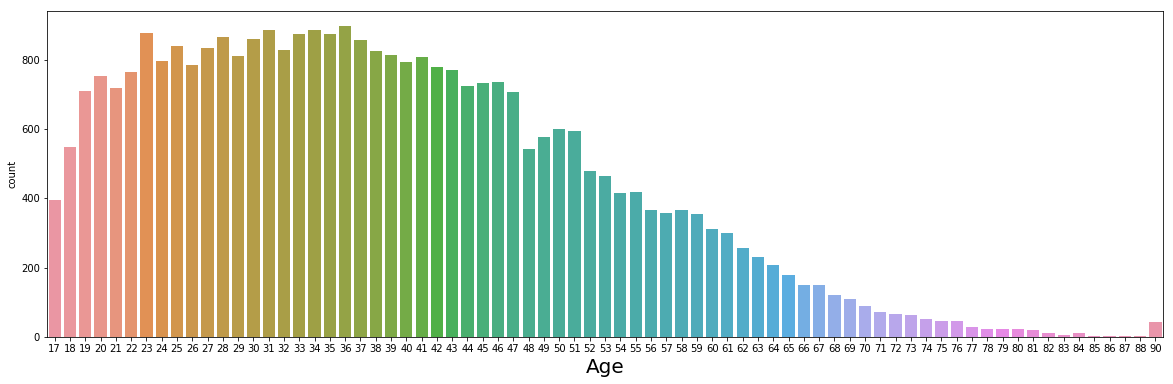

In [107]:
my_attribute1 = df.select_dtypes(include=['int'])
plt.figure(figsize=(20,6))
sns.countplot(data = my_attribute1, x ="age")
plt.xlabel('Age',fontsize=20)

A total of 73 different age groups are present in the above plot.The ages range from 17 to 90 years old with the majority of entries between the ages of 25 and 50 years. Because there are so many ages being represented.

##Workclass

The class of work people work in the industry.

In [50]:
df['workclass'].describe()

count       32561
unique          9
top       Private
freq        22696
Name: workclass, dtype: object

The private workclass has the highest number of records with 22696 and there are a total of 9 different worlclass to work in.

In [51]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

Text(0.5, 0, 'Workclass')

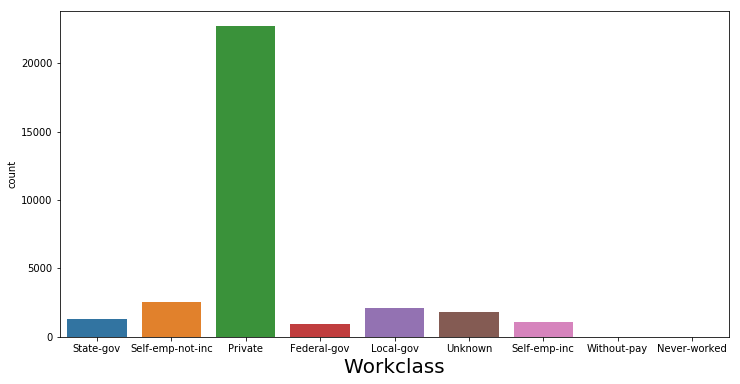

In [104]:
my_attribute2 = df.select_dtypes(include=['object'])
plt.figure(figsize=(12,6))
sns.countplot(data = my_attribute2, x ="workclass")
plt.xlabel('Workclass',fontsize=20)

##Education 

The basic education qualification of people working in the industry.

In [54]:
df['education'].describe()

count       32561
unique         16
top       HS-grad
freq        10501
Name: education, dtype: object

In [55]:
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

Text(0.5, 0, 'Education')

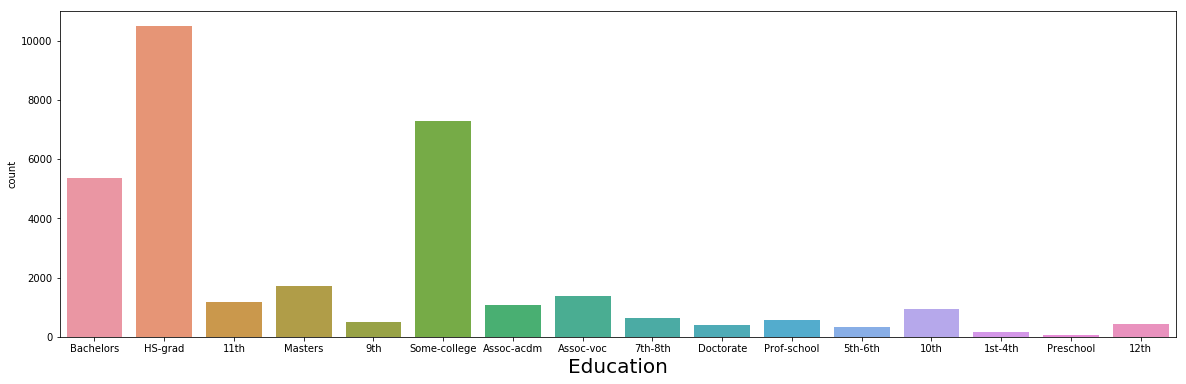

In [103]:
plt.figure(figsize=(20,6))
sns.countplot(data = my_attribute2, x ="education")
plt.xlabel('Education',fontsize=20)

##Education Number

The number of years one spent in getting educated.This coumn is useless for analysis so we should drop it.

In [0]:
#dropping education.num column

df=df.drop(['education.num'],axis=1)

In [63]:
df.shape

(32561, 14)

##Marital Status

The marital status of the people in the dataset.

In [64]:
df['marital.status'].describe()

count                  32561
unique                     7
top       Married-civ-spouse
freq                   14976
Name: marital.status, dtype: object

In [65]:
df['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

Text(0.5, 0, 'Marital Status')

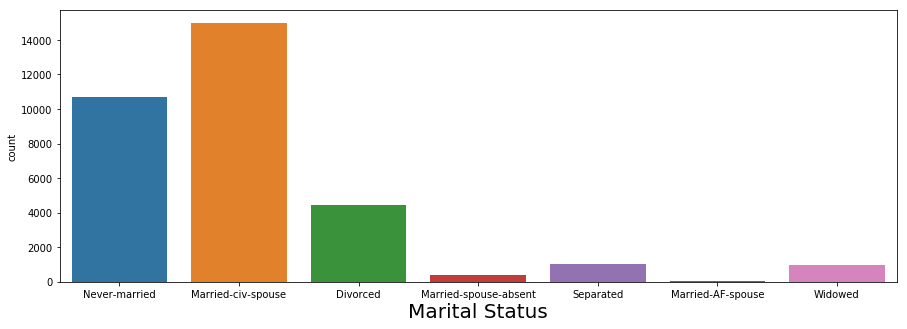

In [102]:
plt.figure(figsize=(15,5))
sns.countplot(data = my_attribute2, x ="marital.status")
plt.xlabel('Marital Status',fontsize=20)

##Occupation

The different departments of the industry they work in.

In [70]:
df['occupation'].describe()

count              32561
unique                15
top       Prof-specialty
freq                4140
Name: occupation, dtype: object

In [71]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Unknown              1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

Text(0.5, 0, 'Occupation')

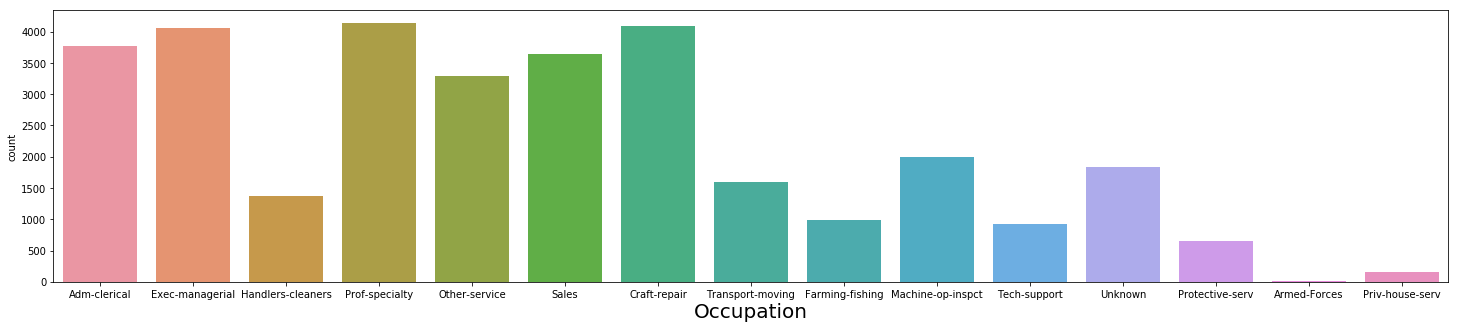

In [101]:
plt.figure(figsize=(25,5))
sns.countplot(data = my_attribute2, x ="occupation")
plt.xlabel('Occupation',fontsize=20)

##Relationship
 The people on the datasets present relationship status.

In [78]:
df['relationship'].describe()

count       32561
unique          6
top       Husband
freq        13193
Name: relationship, dtype: object

In [79]:
df['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

Text(0.5, 0, 'Relationship')

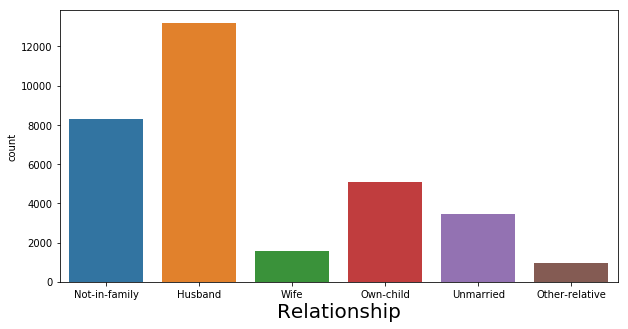

In [100]:
plt.figure(figsize=(10,5))
sns.countplot(data = my_attribute2, x ="relationship")
plt.xlabel('Relationship',fontsize=20)

##Race
The tribal race the people in the dataset belong to.

In [83]:
df['race'].describe()

count     32561
unique        5
top       White
freq      27816
Name: race, dtype: object

In [84]:
df['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

Text(0.5, 0, 'Race')

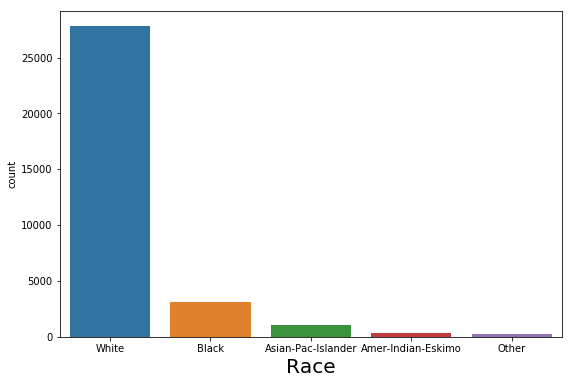

In [99]:
plt.figure(figsize=(9,6))
sns.countplot(data = my_attribute2, x ="race")
plt.xlabel('Race',fontsize=20)

##Sex
The sex of the people in the dataset.

In [91]:
df['sex'].describe()

count     32561
unique        2
top        Male
freq      21790
Name: sex, dtype: object

In [92]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

Text(0.5, 0, 'Sex')

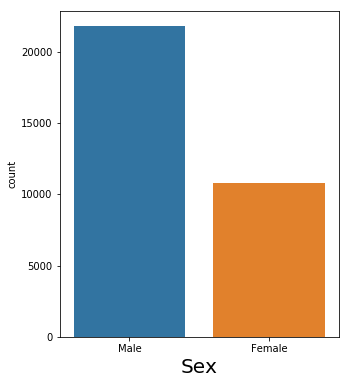

In [98]:
plt.figure(figsize=(5,6))
sns.countplot(data = my_attribute2, x ="sex")
plt.xlabel('Sex',fontsize=20)

##Capital Gain
Capital gain made by the individual after investing.

In [112]:
df['capital.gain'].describe()

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital.gain, dtype: float64

##Capital Loss
Capital loss made by the individual after investing.

In [113]:
df['capital.loss'].describe()

count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital.loss, dtype: float64

##Hours Per Week
The number of hours an individual works in a week

In [114]:
df['hours.per.week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours.per.week, dtype: float64

In [115]:
df['hours.per.week'].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
20     1224
30     1149
55      694
25      674
48      517
38      476
15      404
70      291
10      278
32      266
24      252
65      244
36      220
42      219
44      212
16      205
12      173
43      151
37      149
8       145
52      138
80      133
56       97
28       86
99       85
      ...  
19       14
64       14
51       13
85       13
68       12
98       11
11       11
63       10
78        8
29        7
77        6
59        5
31        5
96        5
67        4
91        3
76        3
81        3
73        2
89        2
97        2
88        2
86        2
61        2
95        2
92        1
94        1
87        1
74        1
82        1
Name: hours.per.week, Length: 94, dtype: int64

Text(0.5, 0, 'Hours per week')

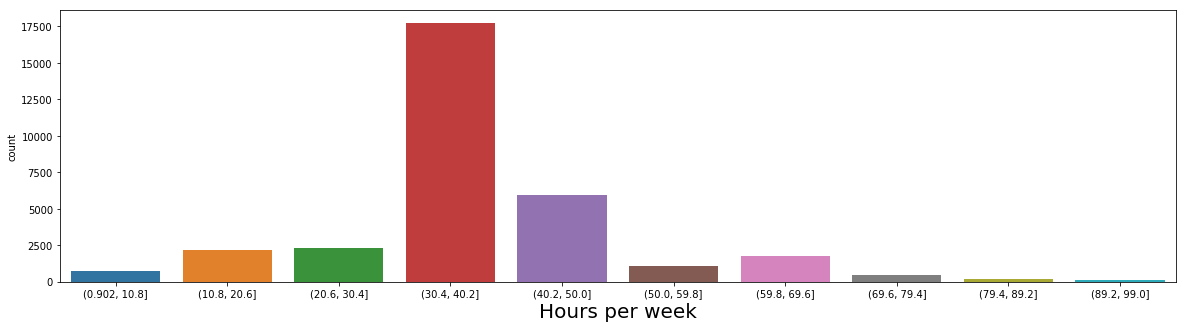

In [117]:
# Ranges for hours per week
df['hours_range'] = pd.cut(df['hours.per.week'], 10)
fig = plt.figure(figsize=(20,5))
sns.countplot(x="hours_range",data=df)
plt.xlabel("Hours per week",fontsize=20)

##Native Country
The different countries the individuals belong to.

In [118]:
df['native.country'].describe()

count             32561
unique               42
top       United-States
freq              29170
Name: native.country, dtype: object

In [119]:
df['native.country'].value_counts()

United-States                 29170
Mexico                          643
Unknown                         583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

Text(0.5, 0, 'Native Country')

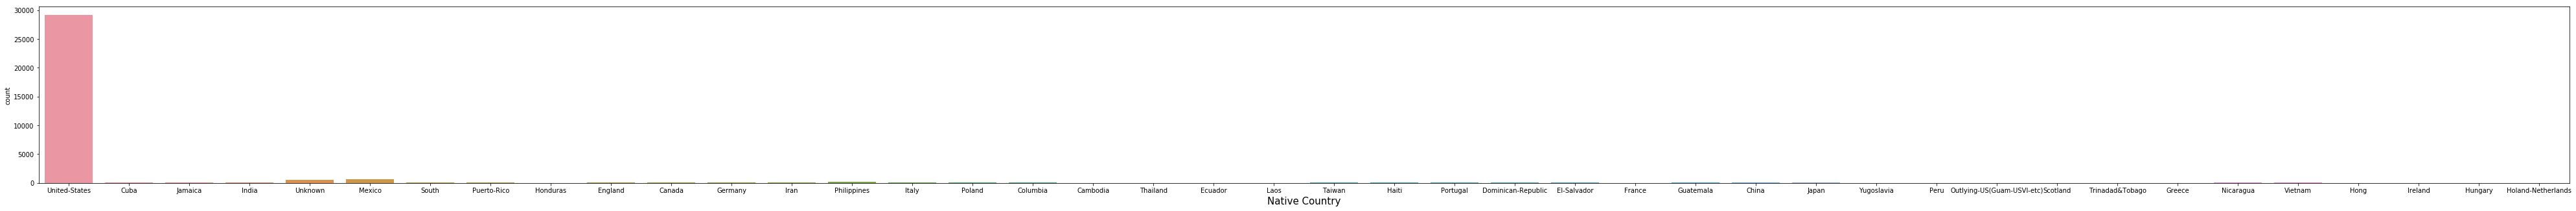

In [128]:
plt.figure(figsize=(70,5))
sns.countplot(data = my_attribute2, x ="native.country")
plt.xlabel('Native Country',fontsize=15)

##Bivariate and Multivariate Analysis
We compare two or more variables so as to gain valuable insights about our data. We will look at the correlation of different variables with respect to our objective in hand i.e. income.

In [129]:
#Before further exploration and analysis of the data,lets check the data again

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
age_range         32561 non-null category
hours_range       32561 non-null category
dtypes: category(2), int64(5), object(9)
memory usage: 3.5+ MB


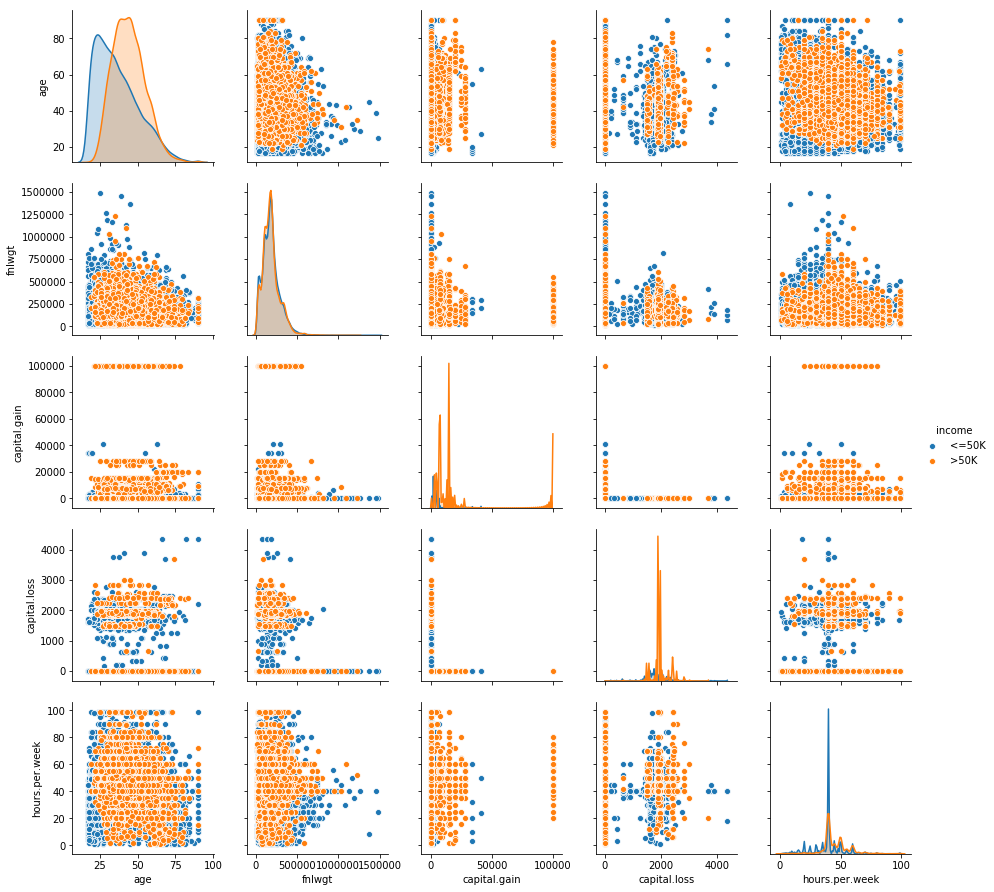

In [130]:
%timeit sns.pairplot(df, hue='income')

So basically what we did here, was that we built a pair plot which is a mixture of histograms and scatter plots to show correlation between different attributes.

To see a better and understandable relationship between attributes, we draw a correlation heatmap for our dataset


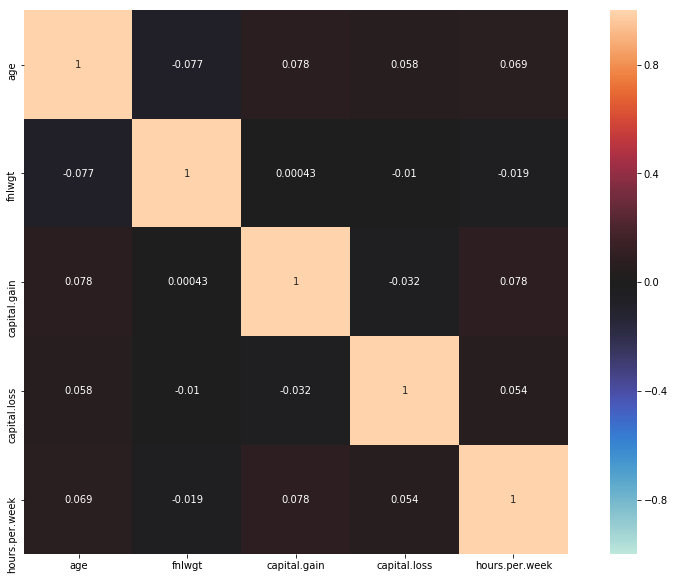

In [133]:
corr = df.corr()
fig=plt.figure(figsize=(15,10))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True, annot=True)

#ax.set_xticklabels(
 #   ax.get_xticklabels(),
   # rotation=45,
    #horizontalalignment='right'
#);

We can't see a good correlation between these numeric attributes

But what we see is:

* The fnlwgt feature looks useless.
* There is some correlation between age, hours.per.week and education.num according to both pair plot and correlation heatmap.
* Capital.gain and Capital.loss don't anticorrelate a lot, which says people will invest only if they have money.